Лабораторная работа №2. Методы стеганоанализа
Коршиков В.И., группа 6233-010402D

Сергунин С.К., группа 6233-010402D

1. Обучение
Произвести обучение классификатора (модель классификатора выбрать самостоятельно) по выборке, содержащей первые 70 % изображений каждого из двух типов (со встраиванием и без. То есть общий объём обучающей выборки составляет 𝐾∙0,7.

2. Применить обученный классификатор на оставшихся 30 % изображений и оценить качество классификации по мере Accuracy. Вывести результат в виде графиков зависимости Accuracy от 𝑞.

3. Повторить пп. 2-4 для других значений 𝑞 и (при желании) для других векторов признаков.

In [ ]:
# Подключим гугл диск
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, roc_curve, plot_confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/LSB_70.csv')
df.head()

,Image Name,series length 1,series length 2,series length 3,series length 4,series length 5,series length 6,series length 7,series length 8,series length 9,series length 10,series length 11,series length 12,with message
0,Image00001.tif,64987.0,32641.0,16370.0,8320.0,4002.0,2067.0,1065.0,541.0,241.0,140.0,77.0,32.0,1.0
1,Image00002.tif,64317.0,31807.0,15916.0,8071.0,4154.0,2173.0,1080.0,625.0,345.0,181.0,106.0,60.0,1.0
2,Image00003.tif,64315.0,31652.0,15960.0,8069.0,4144.0,2204.0,1217.0,565.0,323.0,183.0,99.0,52.0,1.0
3,Image00004.tif,64584.0,31639.0,15873.0,8088.0,4162.0,2128.0,1151.0,613.0,326.0,175.0,99.0,65.0,1.0
4,Image00005.tif,65677.0,32641.0,16470.0,8285.0,4159.0,2042.0,1040.0,450.0,253.0,124.0,52.0,24.0,1.0


In [ ]:
# Создаём датасеты: в первом только серии с длинами выше 5, во втором серии со всеми длинами

df_short = df.drop(columns = ['Image Name', 
                            'series length 1', 'series length 2', 
                            'series length 3', 'series length 4',
                            'series length 5'])

df_long = df.drop(columns = ['Image Name'])

## Опробуем классификатор LogicRegression на длинах выше 5 и на полном наборе и посмотрим, как изменится точность

In [ ]:
# Обучим классификатор LogisticRegression на длинах выше 5

# Задаём зависимую переменную Y, и независимую X
X = df_short.drop('with message', axis = 1)
Y = df_short['with message']

# Поделим обучающую и тестовую выборки 70/30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

# Нормализация
Log = LogisticRegression()
scaler = StandardScaler()
X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)

model_Log = LogisticRegression() 
model_Log.fit(X_train_M, Y_train)
Y_Log = model_Log.predict(X_test_M)

# Найдём f1_score и accuracy_score
score_f1_1 = f1_score(Y_test, Y_Log)
score_accuracy_1 = accuracy_score(Y_test, Y_Log)

print('F1: ', score_f1_1)
print('accuracy: ', score_accuracy_1)

F1:  0.783625730994152
accuracy:  0.7533333333333333


In [ ]:
# Обучим классификатор LogisticRegression на всех длинах

# Задаём зависимую переменную Y, и независимую X
X = df_long.drop('with message', axis = 1)
Y = df_long['with message']

# Поделим обучающую и тестовую выборки 70/30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

# Нормализация
Log = LogisticRegression()
scaler = StandardScaler()
X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)

model_Log = LogisticRegression() 
model_Log.fit(X_train_M, Y_train)
Y_Log = model_Log.predict(X_test_M)


# Найдём f1_score и accuracy_score
score_f1_2 = f1_score(Y_test, Y_Log)
score_accuracy_2 = accuracy_score(Y_test, Y_Log)

print('F1: ', score_f1_2)
print('accuracy: ', score_accuracy_2)

F1:  0.8323353293413174
accuracy:  0.8133333333333334


При переходе с короткого на полный набор признаков, точность повысилась с 75 до 81 процентов

## Опробуем классификатор SVC на длинах выше 5 и на полном наборе и посмотрим, как изменится точность

In [ ]:
# Обучим классификатор LogisticRegression на длинах выше 5 

# Задаём зависимую переменную Y, и независимую X
X = df_short.drop('with message', axis = 1)
Y = df_short['with message']

# Поделим обучающую и тестовую выборки 70/30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

# Нормализация
scale_features_mm = MinMaxScaler()
X_train_new = scale_features_mm.fit_transform(X_train) 
X_test_new = scale_features_mm.fit_transform(X_test)

model_SVC = SVC()
model_SVC.fit(X_train_new, Y_train)
Y_SVC = model_SVC.predict(X_test_new)

# Найдём f1_score и accuracy_score
score_f1_3 = f1_score(Y_test, Y_SVC)
score_accuracy_3 = accuracy_score(Y_test, Y_SVC)

print('F1: ', score_f1_3)
print('accuracy: ', score_accuracy_3)

F1:  0.0
accuracy:  0.49


In [ ]:
# Обучим классификатор SVC на всех длинах

# Задаём зависимую переменную Y, и независимую X
X = df_long.drop('with message', axis = 1)
Y = df_long['with message']

# Поделим обучающую и тестовую выборки 70/30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

# Нормализация
scale_features_mm = MinMaxScaler()
X_train_new = scale_features_mm.fit_transform(X_train) 
X_test_new = scale_features_mm.fit_transform(X_test)


model_SVC = SVC()
model_SVC.fit(X_train_new, Y_train)
Y_SVC = model_SVC.predict(X_test_new)

# Найдём f1_score и accuracy_score
score_f1_4 = f1_score(Y_test, Y_SVC)
score_accuracy_4 = accuracy_score(Y_test, Y_SVC)

print('F1: ', score_f1_4)
print('accuracy: ', score_accuracy_4)

F1:  0.34224598930481287
accuracy:  0.59


При переходе с короткого на полный набор признаков, точность повысилась с 45 до 63 процентов 

## Опробуем классификатор Метод k-ближайших соседей (KNN) на длинах выше 5 и на полном наборе и посмотрим, как изменится точность

In [ ]:
# Обучим классификатор KNN на длинах выше 5 

# Задаём зависимую переменную Y, и независимую X
X = df_short.drop('with message', axis = 1)
Y = df_short['with message']

# Поделим обучающую и тестовую выборки 70/30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

# Нормализация
KNN = KNeighborsClassifier()
scaler = StandardScaler()

steps_KNN = [('normalizer', scaler), ('KNN', KNN)]
pipe_KNN = Pipeline(steps_KNN)

# Подбираем гиперпараметры
params_KNN = \
     {'KNN__n_neighbors': np.arange(5, 50), 
     'KNN__weights': ['uniform', 'distance'], 
     'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search_KNN1 = GridSearchCV(pipe_KNN, params_KNN)
grid_search_KNN1.fit(X_train, Y_train)
grid_search_KNN1.best_params_

{'KNN__algorithm': 'auto', 'KNN__n_neighbors': 29, 'KNN__weights': 'distance'}

In [ ]:
# Обучаем модель с лучшими параметрами
model_KNN = KNeighborsClassifier(algorithm = grid_search_KNN1.best_params_['KNN__algorithm'], 
                                 n_neighbors = grid_search_KNN1.best_params_['KNN__n_neighbors'], 
                                 weights = grid_search_KNN1.best_params_['KNN__weights'])
model_KNN.fit(X_train, Y_train)
Y_KNN = model_KNN.predict(X_test)

# Найдём f1_score и accuracy_score
score_f1_5 = f1_score(Y_test, Y_KNN)
score_accuracy_5 = accuracy_score(Y_test, Y_KNN)

print('F1: ', score_f1_5)
print('accuracy: ', score_accuracy_5)

F1:  0.8046647230320699
accuracy:  0.7766666666666666


In [ ]:
# Обучим классификатор KNN на всех длинах

# Задаём зависимую переменную Y, и независимую X
X = df_long.drop('with message', axis = 1)
Y = df_long['with message']

# Поделим обучающую и тестовую выборки 70/30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

# Нормализация
KNN = KNeighborsClassifier()
scaler = StandardScaler()

steps_KNN = [('normalizer', scaler), ('KNN', KNN)]
pipe_KNN = Pipeline(steps_KNN)

# Подбираем гиперпараметры
params_KNN = \
     {'KNN__n_neighbors': np.arange(5, 50), 
     'KNN__weights': ['uniform', 'distance'], 
     'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search_KNN1 = GridSearchCV(pipe_KNN, params_KNN)
grid_search_KNN1.fit(X_train, Y_train)
grid_search_KNN1.best_params_

{'KNN__algorithm': 'auto', 'KNN__n_neighbors': 16, 'KNN__weights': 'distance'}

In [ ]:
# Обучаем модель с лучшими параметрами
model_KNN = KNeighborsClassifier(algorithm = grid_search_KNN1.best_params_['KNN__algorithm'], 
                                 n_neighbors = grid_search_KNN1.best_params_['KNN__n_neighbors'], 
                                 weights = grid_search_KNN1.best_params_['KNN__weights'])
model_KNN.fit(X_train, Y_train)
Y_KNN = model_KNN.predict(X_test)

# Найдём f1_score и accuracy_score
score_f1_6 = f1_score(Y_test, Y_KNN)
score_accuracy_6 = accuracy_score(Y_test, Y_KNN)

print('F1: ', score_f1_6)
print('accuracy: ', score_accuracy_6)

F1:  0.8823529411764707
accuracy:  0.88


При переходе с короткого на полный набор признаков, точность повысилась с 77,6 до 88 процентов

## Опробуем классификатор RandomForest на длинах выше 5 и на полном наборе и посмотрим, как изменится точность

In [ ]:
# Обучим классификатор RandomForest на длинах выше 5 

# Задаём зависимую переменную Y, и независимую X
X = df_short.drop('with message', axis = 1)
Y = df_short['with message']

# Поделим обучающую и тестовую выборки 70/30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

# Нормализация
RFC = RandomForestClassifier()
scaler = StandardScaler()

steps_RFC = [('normalizer', scaler), ('RFC', RFC)]
pipe_RFC = Pipeline(steps_RFC)


# Подбираем гиперпараметры
params_RFC = \
     {'RFC__n_estimators': np.arange(10, 100),
     'RFC__criterion': ['gini', 'entropy']}
grid_search_RFC1 = GridSearchCV(pipe_RFC, params_RFC)
grid_search_RFC1.fit(X_train, Y_train)
grid_search_RFC1.best_params_

{'RFC__criterion': 'entropy', 'RFC__n_estimators': 62}

In [ ]:
# Обучаем модель с лучшими параметрами

model_RFC = RandomForestClassifier(n_estimators = grid_search_RFC1.best_params_['RFC__n_estimators'], 
                                 criterion = grid_search_RFC1.best_params_['RFC__criterion'])
model_RFC.fit(X_train, Y_train)
Y_RFC = model_RFC.predict(X_test)

# Найдём f1_score и accuracy_score
score_f1_5 = f1_score(Y_test, Y_KNN)
score_accuracy_5 = accuracy_score(Y_test, Y_KNN)

# Найдём f1_score и accuracy_score
score_f1_7 = f1_score(Y_test, Y_RFC)
score_accuracy_7 = accuracy_score(Y_test, Y_RFC)

print('F1: ', score_f1_7)
print('accuracy: ', score_accuracy_7)

F1:  0.7875000000000001
accuracy:  0.7733333333333333


In [ ]:
# Обучим классификатор RandomForest на всех длинах

# Задаём зависимую переменную Y, и независимую X
X = df_long.drop('with message', axis = 1)
Y = df_long['with message']

# Поделим обучающую и тестовую выборки 70/30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

# Нормализация
RFC = RandomForestClassifier()
scaler = StandardScaler()

steps_RFC = [('normalizer', scaler), ('RFC', RFC)]
pipe_RFC = Pipeline(steps_RFC)


# Подбираем гиперпараметры
params_RFC = \
     {'RFC__n_estimators': np.arange(10, 100),
     'RFC__criterion': ['gini', 'entropy']}
grid_search_RFC2 = GridSearchCV(pipe_RFC, params_RFC)
grid_search_RFC2.fit(X_train, Y_train)
grid_search_RFC2.best_params_

{'RFC__criterion': 'entropy', 'RFC__n_estimators': 97}

In [ ]:
# Обучаем модель с лучшими параметрами

model_RFC = RandomForestClassifier(n_estimators = grid_search_RFC2.best_params_['RFC__n_estimators'], 
                                 criterion = grid_search_RFC2.best_params_['RFC__criterion'])
model_RFC.fit(X_train, Y_train)
Y_RFC = model_RFC.predict(X_test)

# Найдём f1_score и accuracy_score
score_f1_5 = f1_score(Y_test, Y_KNN)
score_accuracy_5 = accuracy_score(Y_test, Y_KNN)

# Найдём f1_score и accuracy_score
score_f1_8 = f1_score(Y_test, Y_RFC)
score_accuracy_8 = accuracy_score(Y_test, Y_RFC)

print('F1: ', score_f1_8)
print('accuracy: ', score_accuracy_8)

F1:  0.8614457831325301
accuracy:  0.8466666666666667


При переходе с короткого на полный набор признаков, точность повысилась с 77 до 85 процентов

# Зависимость точности от заполненности контейнера

In [ ]:
# Классификатор RandomForestClassifier на полном наборе принаков

Q = []
Accur = []
for percent in range(20, 110, 10):
    df_name = '/content/drive/MyDrive/LSB_' + str(percent) + '.csv'
    df = pd.read_csv(df_name)

    df_new = df.drop(columns = ['Image Name'])    
    
    # Задаём зависимую переменную Y, и независимую X
    X = df_new.drop('with message', axis = 1)
    Y = df_new['with message']
    
    # Поделим обучающую и тестовую выборки 70/30
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
    X_train.shape, X_test.shape
    
    # Нормализуем данные
    scale_features_mm = MinMaxScaler()
    X_train_new = scale_features_mm.fit_transform(X_train) 
    X_test_new = scale_features_mm.fit_transform(X_test)

        
    model_RFC = RandomForestClassifier(n_estimators = grid_search_RFC2.best_params_['RFC__n_estimators'], 
                                 criterion = grid_search_RFC2.best_params_['RFC__criterion'])

    model_RFC.fit(X_train, Y_train)
    Y_RFC = model_RFC.predict(X_test)

    Q.append(percent)
    Accur.append(round(accuracy_score(Y_test, Y_RFC), 6))

In [ ]:
print(Q)    
print(Accur)

[20, 30, 40, 50, 60, 70, 80, 90, 100]
[0.633333, 0.68, 0.723333, 0.753333, 0.793333, 0.85, 0.886667, 0.916667, 0.926667]


<function matplotlib.pyplot.show(*args, **kw)>

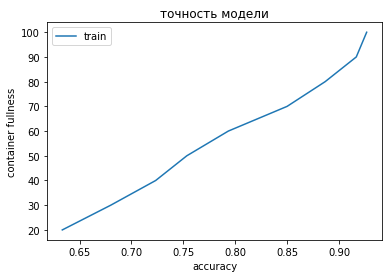

In [ ]:
plt.plot(Accur, Q)
plt.title('точность модели')
plt.ylabel('container fullness')
plt.xlabel('accuracy')
plt.legend(['train'], loc = 'upper left')
plt.show

## Как видно из графика, при увеличении уровня заполненности точность классификации возроста